In [1]:
#importing necessary analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm 
import scipy.stats as stats

In [3]:
#Loading orginal dataframe
Data = pd.read_csv(r'C:\Users\poulo\OneDrive\Desktop\task.csv')
display(Data)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [4]:
#Dropping unnecessary columns 
Cleaned_Data=Data.drop(['Transaction date','latitude', 'longitude'], axis=1)
Cleaned_Data.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1


In [5]:
#Checking for null values
Cleaned_Data.isnull().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [6]:
#Checking correlation between variables
Cleaned_Data.corr()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
House Age,1.000000,0.025622,0.049593,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.025622,1.000000,-0.602519,-0.046856,0.001795,-0.673613
Number of convenience stores,0.049593,-0.602519,1.000000,0.043638,0.033286,0.571005
Number of bedrooms,-0.008756,-0.046856,0.043638,1.000000,0.752276,0.050265
House size (sqft),-0.060361,0.001795,0.033286,0.752276,1.000000,0.046489
House price of unit area,-0.210567,-0.673613,0.571005,0.050265,0.046489,1.000000


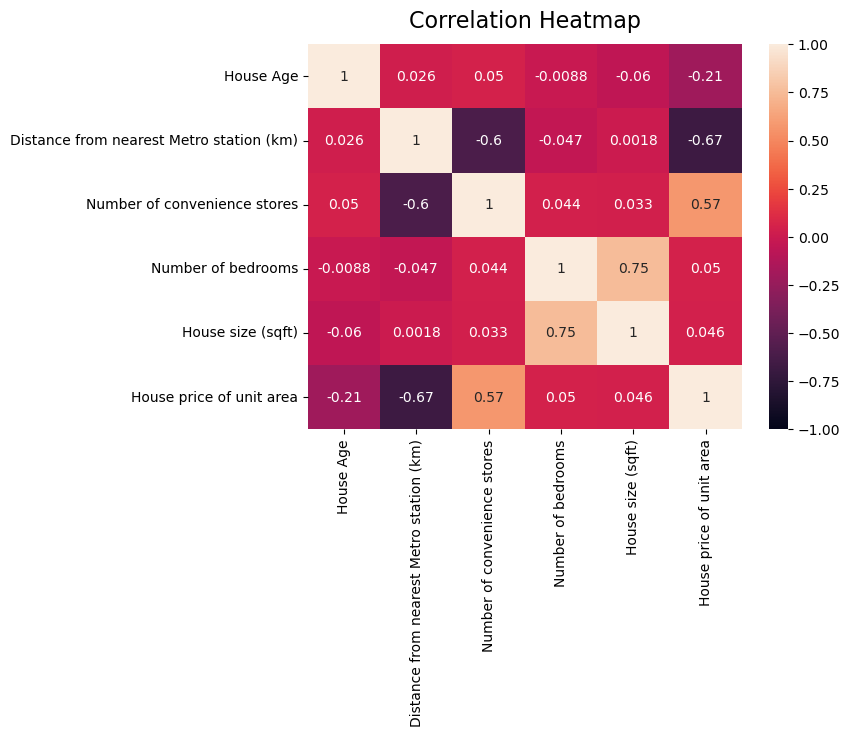

In [7]:
#Checking correlation between variables using correlation heatmap
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(Cleaned_Data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

Here We can see that only "Distance from nearest Metro station (km), Number of convenience stores, Number of bedrooms, House size (sqft)" these variabels are highly correlated with 'House price of unit area' as correlation coefficients are greater than (+/-0.5). So we are considering only these values only to predict the price.

In [8]:
#preparing final dataframe for regression
X=Data.drop(['House Age','Transaction date','latitude', 'longitude','House price of unit area'], axis=1)
display(X)
Y=Data['House price of unit area']
display(Y)

,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft)
0,84.87882,10,1,575
1,306.59470,9,2,1240
2,561.98450,5,3,1060
3,561.98450,5,2,875
4,390.56840,5,1,491
...,...,...,...,...
409,4082.01500,0,3,803
410,90.45606,9,2,1278
411,390.96960,7,1,503
412,104.81010,5,1,597


0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House price of unit area, Length: 414, dtype: float64

Mean Absolute Error(MAE)= 6.5575870729400885
Mean Squared Error(MSE)= 68.57645666765977
Intercept=38.22365368953617
Coefficient=[-0.00557015  1.20354874 -0.97362022  0.00333273]
Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft)
R^2=0.5025065425141948


<AxesSubplot:xlabel='House price of unit area'>

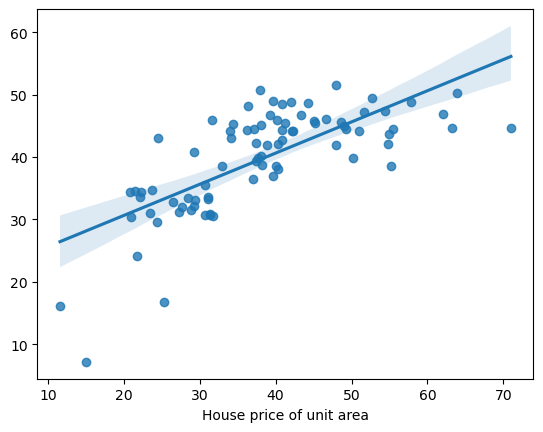

In [9]:
#Linear regression
model=LinearRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
reg=model.fit(X_train,Y_train)  
Y_predict = reg.predict(X_test)
print("Mean Absolute Error(MAE)=",mean_absolute_error(Y_test, Y_predict))
print("Mean Squared Error(MSE)=",mean_squared_error(Y_test, Y_predict))
print("Intercept="+str(reg.intercept_))
print("Coefficient="+str(reg.coef_))
print("Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft)")
print("R^2="+str(r2_score(Y_test,Y_predict)))
sns.regplot(data=Data,x=Y_test,y=Y_predict)

Here we can see that if the number of bedrooms increases then the price is getting decreased which is not in a proper relation. coefficient is coming in negative which should have come in positive. Then there is problem with the collected data.

In linear regression model R square value is coming less that 50% maximum time. So, we will not consider linear regression for prediction.

MAE= 6.536963128974683
MSE= 68.03860593563975
Intercept=37.940513659044264
Coefficient=[-0.00559477  1.19371347 -0.83066915  0.00288895]
Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft)
R^2=0.518648927037344


<AxesSubplot:xlabel='House price of unit area'>

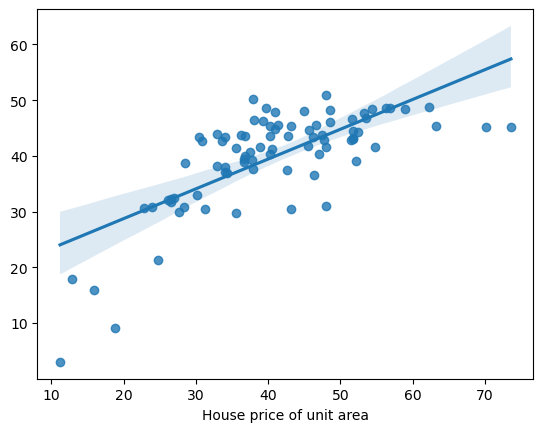

In [10]:
#Ridge regression
model=Ridge(alpha=1.5)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
reg=model.fit(X_train,Y_train)  
Y_predict = reg.predict(X_test)
print("MAE=",mean_absolute_error(Y_test, Y_predict))
print("MSE=",mean_squared_error(Y_test, Y_predict))
print("Intercept="+str(reg.intercept_))
print("Coefficient="+str(reg.coef_))
print("Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft)")
print("R^2="+str(r2_score(Y_test,Y_predict)))
sns.regplot(data=Data,x=Y_test,y=Y_predict)

In Ridge regression model R square value is coming less that 50% maximum time. So, we will consider Ridge regression for prediction.

MAE= 7.180587457785876
MSE= 85.73201704572911
Intercept=39.721604682409165
Coefficient=[-0.00628604  0.91401091 -0.          0.00192449]
Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft)
R^2=0.37778247637967133


<AxesSubplot:xlabel='House price of unit area'>

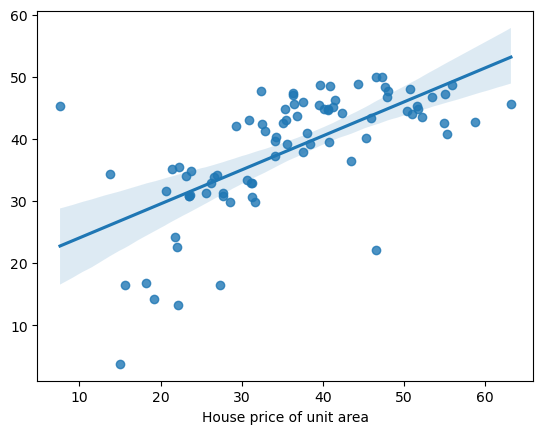

In [11]:
#Lasso regression
model=Lasso(alpha=1.5)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
reg=model.fit(X_train,Y_train)  
Y_predict = reg.predict(X_test)
print("MAE=",mean_absolute_error(Y_test, Y_predict))
print("MSE=",mean_squared_error(Y_test, Y_predict))
print("Intercept="+str(reg.intercept_))
print("Coefficient="+str(reg.coef_))
print("Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft)")
print("R^2="+str(r2_score(Y_test,Y_predict)))
sns.regplot(data=Data,x=Y_test,y=Y_predict)

In Lasso regression model R square value is fluctuating rapidly. So, we will not consider Lasso regression for prediction.

Regression Techniques will be considered in the following manner. : 
Ridge>Linear>Lasso